Данный скрипт проводит первоначальную обработку данных и преобразует данные в таблицу вида:

```part_number | name | date | y```

```part_number``` -- уникальный артикул юнита 

```name``` -- номенклатура

```ds``` -- дата начала недели в период которой считаются продажи

```y``` -- выручка (целевая переменная) с продаж юнита с артикулом ```part_number``` за неделю начиная с ```ds```

При этом продажи для каждого артикула складываются по всем каналам дистрибуции.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_excel('../data/sales_2014-2016.xlsx', sheet_name='TDSheet', skiprows=7, index_col=0)
df_2 = pd.read_excel('../data/sales_2017-2018.xlsx', sheet_name='TDSheet', skiprows=7, index_col=0)
df_3 = pd.read_excel('../data/sales_2019-2020.xlsx', sheet_name='TDSheet', skiprows=7, index_col=0)
df_4 = pd.read_excel('../data/sales_2021-2022.xlsx', sheet_name='TDSheet', skiprows=7, index_col=0)
df_5 = pd.read_excel('../data/sales_2023-2025.xlsx', sheet_name='TDSheet', skiprows=0, index_col=0)
full_df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [7]:
full_df['ds'] = pd.to_datetime(full_df['По неделям'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y')

Создаем датафрейм для обучения

In [8]:
df = pd.DataFrame()
df['part_number'] = full_df['Артикул']
df['ds'] = full_df['ds']
df['ds'] = pd.to_datetime(df['ds'])
df['name'] = full_df['Номенклатура']
df['revenue'] = full_df['Сумма продажи в руб.']
df = df.groupby(['part_number', 'ds', 'name'], as_index=False)['revenue'].sum()
df['part_number'] = df['part_number'].astype(str)

In [9]:
df.head()

,part_number,ds,name,revenue
0,30812,2020-08-10,"Конфеты ""CHO KO-TE вареная сгущенка"" Пакет 200...",7188.12
1,30812,2020-08-17,"Конфеты ""CHO KO-TE вареная сгущенка"" Пакет 200...",241426.25
2,30812,2020-08-24,"Конфеты ""CHO KO-TE вареная сгущенка"" Пакет 200...",45562.37
3,30812,2020-08-31,"Конфеты ""CHO KO-TE вареная сгущенка"" Пакет 200...",83196.55
4,30812,2020-09-07,"Конфеты ""CHO KO-TE вареная сгущенка"" Пакет 200...",135686.65


In [10]:
print('Количество уникальных артикулов:', len(df['part_number'].unique()))

Количество уникальных артикулов: 834


In [11]:
part_numbers = df['part_number'].unique()
ts_len_arr = [] 
part_number_ts_len = {}
for part_number in part_numbers:
    ts_len = len(df[df['part_number'] == part_number])
    ts_len_arr.append(ts_len)
    part_number_ts_len[part_number] = ts_len

In [12]:
part_number_ts_len = sorted(part_number_ts_len.items(), key=lambda item: item[1])

In [13]:
df[df['part_number'] == part_number]['name'].iloc[0]

'Конфеты "Arami" в глазури с шоколадной начинкой и целым фундуком ДОЙ-ПАК 300 г'

In [14]:
shortest_ts_part_numbers = []
longest_ts_part_numbers = []

shortest_ts_names = []
longest_ts_names = []

top_k = 50

for part_number, ts_len in part_number_ts_len[:top_k]:
    shortest_ts_part_numbers.append(df[df['part_number'] == part_number]['part_number'].iloc[0])
    shortest_ts_names.append(df[df['part_number'] == part_number]['name'].iloc[0])

for part_number, ts_len in part_number_ts_len[-top_k:]:
    longest_ts_part_numbers.append(df[df['part_number'] == part_number]['part_number'].iloc[0])
    longest_ts_names.append(df[df['part_number'] == part_number]['name'].iloc[0])

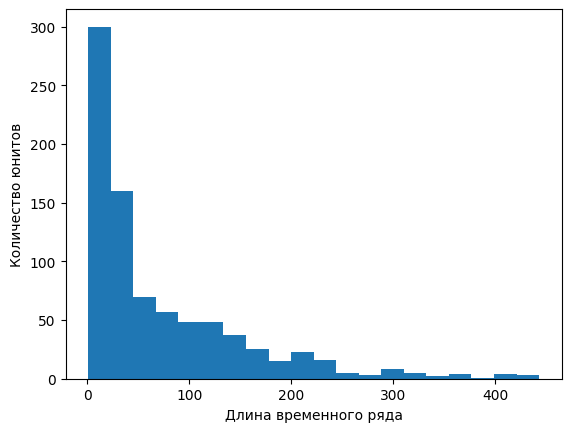

In [15]:
plt.hist(ts_len_arr, bins=20)
plt.xlabel('Длина временного ряда')
plt.ylabel('Количество юнитов')
plt.show()

In [16]:
print('Самые короткие временные ряды: ')
print(*shortest_ts_names, sep="\n")
print('\n############### \n ')

Самые короткие временные ряды: 
ПЭТ: Изделия фигурные со вкусом шоколада "Кукурустеры" вал 3 кг  УП1
БЕСЕДА®. ПЭТ: Палочки хрустящие с начинкой со вкусом ванили вал 5 кг  УП1
Снэки "Трубочки хрустящие со вкусом сгущенного молока" вал 4 кг  УП1
Снэки "Трубочки хрустящие со вкусом шоколада" вал 4 кг  УП1
Снэки Трубочки "Кукурустер" со вкусом сгущенного молока Коробка 400 г  УП20
ЗОЛОТАЯ БЕЛОЧКА® Снэки: Трубочки хрустящие с какао со вкусом сгущенного молока вал 2 кг  УП1
РУССКИЕ ПРОСТОРЫ®. Мармелад желейный со вкусами клубники и яблока вал 2 кг  УП1
ВКУС ЗДОРОВЬЯ®. Мармелад желейный со вкусами клубники и яблока вал 2 кг  УП1
FASHION CLUB®. Мармелад желейный со вкусами вишни и абрикоса вал 2 кг  УП1
РУССКИЕ СКАЗКИ®. Мармелад желейный со вкусами вишни и абрикоса вал 2 кг  УП1
МУХТАР® Продукты эктрузионной технологии: Подушечки с какао и молоком вал 5 кг  УП1
ЗОЛОТАЯ КОРОНА® Продукты эктрузионной технологии: Подушечки с банановой начинкой вал 5 кг  УП1
ШОКО ДЖАЗ® Продукты эктрузионной технол

In [17]:
print('Самые длинные временные ряды: ')
print(*longest_ts_names, sep="\n")

Самые длинные временные ряды: 
Конфеты "35" со вкусом шоколада ГЛ 300 г  УП20
CRASHBASH®. Снэки: Фигурные изделия со вкусом карамели и арахиса вал 3 кг  УП1
CRASHBASH®. Снэки: Фигурные изделия со вкусом шоколадного брауни вал 3 кг  УП1
Конфеты "TRUFFLE CLASSIC" Пакет 1 кг  УП4
Конфеты "TRUFFLE MILK" Пакет 1 кг  УП4
Конфеты "Доярушка" Пакет 1 кг  УП4
Набор жевательных конфет "SWEETY!" Пакет 1 кг  УП5
Конфеты "Золушка" Пакет 1 кг  УП7
Конфеты "Белый Мишка" Пакет 500 г  УП7
ДаЁжъ® LIGHT Конфеты со вкусом шоколадного брауни Пакет 500 г  УП6
Вафли "Вертушки-Веснушки" со вкусом вареной сгущенки Коробка 500 г  УП20
Конфеты "35 TWEEL'S" с дробленым арахисом и криспи Пакет 280 г  УП8
Изделия кондитерские. Молочная плитка "CHO KO-TE"® Малина-Манго 43 г Шоубокс 20 шт  УП8
Конфеты "35" со сливочной начинкой вал 4 кг  УП1
Конфеты "35 TWEEL'S" со вкусом шоколада Пакет 500 г  УП5
Снэки "Трубочки хрустящие со вкусом сгущенного молока" ГЛ 400 г  УП9
Конфеты "35 TWEEL'S" со вкусом шоколадного брауни Пак

Оставим только топ 50 позиций по длине временных рядов.

In [18]:
df = df[df['part_number'].isin(longest_ts_part_numbers)]
# Оставим только те артикулы, которые встречаются в 2025 году
pn_2025 = df.loc[df['ds'].dt.year == 2025, 'part_number'].unique()
df = df[df['part_number'].isin(pn_2025)]

In [19]:
len(df['part_number'].unique())

14

Сохраняем обработанный датасет:

In [21]:
df = df.rename(columns={'revenue': 'y'})
df.to_csv('../data/prepared_dataset.csv')

In [ ]:
df['ds'] = pd.to_datetime(df['По неделям'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y')

# Стартовая дата
start_date = pd.to_datetime('13.01.2014', format='%d.%m.%Y')

# Сквозная нумерация недель
df['week_index'] = ((df['ds'] - start_date).dt.days // 7) + 1

In [7]:
df = df.sort_values(by=['week_index'])

Text(0, 0.5, 'Сумма продажи в руб.')

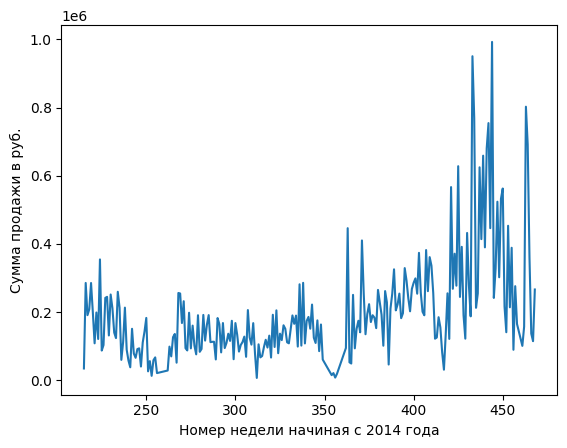

In [9]:
plt.plot(df['week_index'], df['Сумма продажи в руб.'])
plt.xlabel('Номер недели начиная с 2014 года')
plt.ylabel('Сумма продажи в руб.')
# for k in range(1, 10):
#     plt.vlines(52*k, 0, 5e7, color='k')

In [10]:
# df — ваш датафрейм, 'date' — начало недели, 'sales' — продажи
df['date'] = pd.to_datetime(df['date'])

# Признак: недели до/после Нового года
df['weeks_to_newyear'] = df['date'].apply(lambda d: (pd.Timestamp(year=d.year, month=1, day=1) - d).days // 7)

# Признак: сезон
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'winter'
    elif date.month in [3, 4, 5]:
        return 'spring'
    elif date.month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
df['season'] = df['date'].apply(get_season)

In [11]:
from prophet import Prophet

# Переименуем столбцы
df = df.rename(columns={'date': 'ds', 'Сумма продажи в руб.': 'y'})

# Кодируем сезон (one-hot)
df = pd.concat([df, pd.get_dummies(df['season'])], axis=1)

/Users/andrey/essen_sales_prediction/.env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [12]:
years = range(df['ds'].dt.year.min(), df['ds'].dt.year.max() + 1)
holidays = pd.DataFrame({
    'holiday': 'new_year',
    'ds': pd.to_datetime([f'{y}-01-01' for y in years]),
    'lower_window': -28,  # за 2 недели до праздника
    'upper_window': 1     # и 1 день после
})

In [13]:
m = Prophet(holidays=holidays, 
            yearly_seasonality=True, 
            weekly_seasonality=False,
            n_changepoints=50,
            changepoint_range=0.95,
            changepoint_prior_scale=0.5,
            )
m.add_regressor('weeks_to_newyear')
for season in ['winter', 'spring', 'summer', 'autumn']:
    m.add_regressor(season)

m.fit(df)

17:43:25 - cmdstanpy - INFO - Chain [1] start processing
17:43:25 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=1, freq='W')
future['weeks_to_newyear'] = future['ds'].apply(lambda d: (pd.Timestamp(year=d.year, month=1, day=1) - d).days // 7)
future['season'] = future['ds'].apply(get_season)
future = pd.concat([future, pd.get_dummies(future['season'])], axis=1)

forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1))


            ds           yhat   yhat_lower     yhat_upper
239 2023-01-01  191574.703185  49619.54375  320314.627714


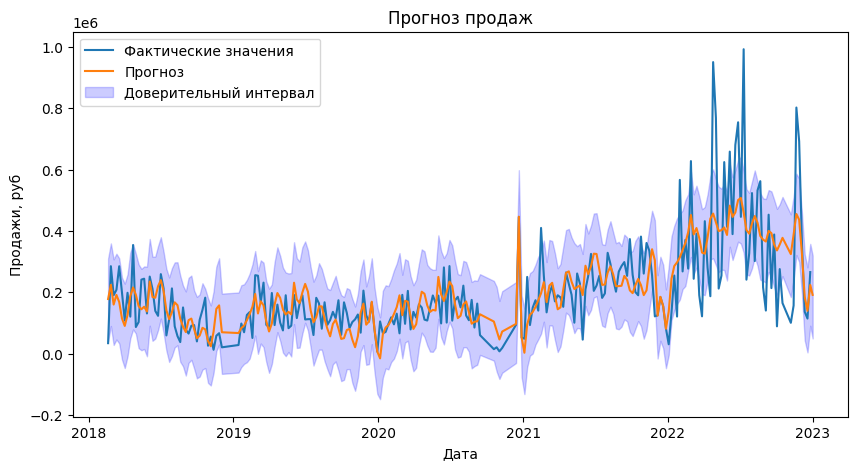

In [21]:
cut = 1000000
plt.figure(figsize=(10, 5))
plt.plot(df['ds'][:cut], df['y'][:cut], label='Фактические значения')
plt.plot(forecast['ds'][:cut], forecast['yhat'][:cut], label='Прогноз')
plt.fill_between(forecast['ds'][:cut], forecast['yhat_lower'][:cut], forecast['yhat_upper'][:cut], color='blue', alpha=0.2, label='Доверительный интервал')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Продажи, руб')
plt.title('Прогноз продаж')
plt.show()

In [16]:
len(forecast['yhat'])


240

In [17]:
len(df['y'])

239

In [18]:
merged = pd.merge(df[['ds', 'y']], forecast[['ds', 'yhat']], on='ds', how='inner')

# Теперь длины совпадают, можно сравнивать
y_true = merged['y'][1:]
y_pred = merged['yhat'][1:]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# y_true — реальные значения, y_pred_prophet — прогноз Prophet, y_pred_naive — прогноз наивной модели

# Наивный прогноз (shift на одну неделю назад)
y_pred_naive = df['y'].shift(1)[1:]

# Prophet прогноз (должен быть синхронизирован по датам с y_true)
# y_pred_prophet = forecast['yhat'][1:]  # если forecast совпадает по индексам

# Метрики для Prophet
mae_prophet = mean_absolute_error(y_true, y_pred)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mape_prophet = mean_absolute_percentage_error(y_true, y_pred)

# Метрики для наивной модели
mae_naive = mean_absolute_error(y_true, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_true, y_pred_naive))
mape_naive = mean_absolute_percentage_error(y_true, y_pred_naive)

print(f"Prophet MAE: {mae_prophet:.2f}, Naive MAE: {mae_naive:.2f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}, Naive RMSE: {rmse_naive:.2f}")
print(f"Prophet MAPE: {mape_prophet*100:.2f}%, Naive MAPE: {mape_naive*100:.2f}%")

Prophet MAE: 73785.31, Naive MAE: 106935.54
Prophet RMSE: 106151.18, Naive RMSE: 159767.04
Prophet MAPE: 54.75%, Naive MAPE: 71.32%


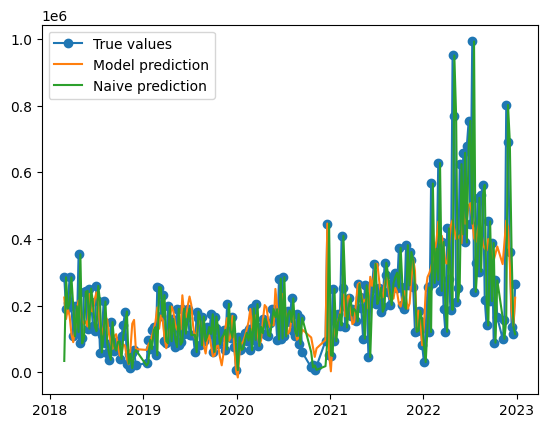

In [20]:
plt.plot(df['ds'][1:], y_true, '-o', label='True values')
plt.plot(df['ds'][1:], y_pred, label='Model prediction')
plt.plot(df['ds'][1:], y_pred_naive, label='Naive prediction')
plt.legend()